# Business Problem

# Dataset Story

# Import To Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import to Dataset 

In [2]:
A_ = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
B_ = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")

# Exploratory data analysis

In [5]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [13]:
def check_df(df, head=5, box=False, column="Purchase"):#Since the target variable we focus on here is the Purchase variable, we will be moving through this variable.
    print("###################### Shape ######################")
    print(df.shape)

    print("###################### Types ######################")
    print(df.dtypes)

    print("###################### Head ######################")
    print(df.head(head))

    print("###################### Missing Value Analysis ######################")
    print(missing_values_analysis(df))

    print("###################### Quantiles ######################")
    print(df.quantile([0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)

    print("###################### BOX PLOT ######################")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

###################### Shape ######################
(40, 4)
###################### Types ######################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
###################### Head ######################
   Impression     Click  Purchase   Earning
0  82529.4593 6090.0773  665.2113 2311.2771
1  98050.4519 3382.8618  315.0849 1742.8069
2  82696.0235 4167.9657  458.0837 1797.8274
3 109914.4004 4910.8822  487.0908 1696.2292
4 108457.7626 5987.6558  441.0340 1543.7202
###################### Missing Value Analysis ######################
Empty DataFrame
Columns: [Total Missing Values, Ratio]
Index: []
###################### Quantiles ######################
               0.0000     0.0500     0.1000     0.2500     0.5000      0.7500  \
Impression 45475.9430 79412.0179 81711.1203 85726.6903 99790.7011 115212.8165   
Click       2189.7532  3367.4843  3582.0866  4124.3041  5001.2206   5923.8036   
Purchase     267.0289   328.6624   381

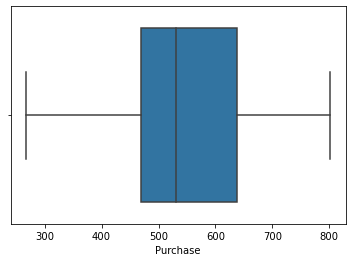

None


In [14]:
check_df(A_,box=True)

###################### Shape ######################
(40, 4)
###################### Types ######################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
###################### Head ######################
   Impression     Click  Purchase   Earning
0 120103.5038 3216.5480  702.1603 1939.6112
1 134775.9434 3635.0824  834.0543 2929.4058
2 107806.6208 3057.1436  422.9343 2526.2449
3 116445.2755 4650.4739  429.0335 2281.4286
4 145082.5168 5201.3877  749.8604 2781.6975
###################### Missing Value Analysis ######################
Empty DataFrame
Columns: [Total Missing Values, Ratio]
Index: []
###################### Quantiles ######################
               0.0000     0.0500     0.1000      0.2500      0.5000  \
Impression 79033.8349 83150.5038 97389.7667 112691.9708 119291.3008   
Click       1836.6299  2600.3610  2917.2653   3376.8190   3931.3598   
Purchase     311.6295   356.6954   381.0550    444.6268    551.3557 

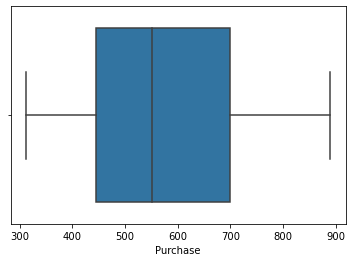

None


In [15]:
check_df(B_,box=True)

# After the analysis, combine the control and test group data using the concat method.

In [16]:
A_.columns = [i+"_A" for i in A_.columns]
B_.columns = [i+"_B" for i in B_.columns]
df = pd.concat([A_, B_], axis=1)
df.head()

,Impression_A,Click_A,Purchase_A,Earning_A,Impression_B,Click_B,Purchase_B,Earning_B
0,82529.4593,6090.0773,665.2113,2311.2771,120103.5038,3216.5480,702.1603,1939.6112
1,98050.4519,3382.8618,315.0849,1742.8069,134775.9434,3635.0824,834.0543,2929.4058
2,82696.0235,4167.9657,458.0837,1797.8274,107806.6208,3057.1436,422.9343,2526.2449
3,109914.4004,4910.8822,487.0908,1696.2292,116445.2755,4650.4739,429.0335,2281.4286
4,108457.7626,5987.6558,441.0340,1543.7202,145082.5168,5201.3877,749.8604,2781.6975


## Define the hypothesis.

H0 : M1 = M2 => There is no significant difference between the average return average bidding return and the maximum bidding return average.

H1 : M1 ≠ M2 => There is a significant difference between the average return average bidding return and the maximum bidding return average.

In [17]:
print("Purchasing<Purchase> averages of the Control Group : %.4f" %A_['Purchase_A'].mean(), "\n",
      "Purchasing <Purchase> averages of the Test Group : %.4f"  %B_['Purchase_B'].mean())

Purchasing<Purchase> averages of the Control Group : 550.8941 
 Purchasing <Purchase> averages of the Test Group : 582.1061


## Performing Hypothesis Testing

The assumption of normality is that the relevant variables in the data set are compatible with the theoretical normal distribution. In other words, it is checked whether the data is normally distributed or not. Another assumption is Variance Homogeneity.

In [18]:
test_st , p_value = shapiro(A_["Purchase_A"])
print('Test statistic = %.4f, P-Value = %.4f' % (test_st, p_value))

Test statistic = 0.9773, P-Value = 0.5891


H0 cannot be rejected because the P val value is greater than 0.05. Let's remember H0 again, H0 is the hypothesis that there is no difference between the data distribution and the theoretical normal distribution. Our data is normally distributed.

In [19]:
test_st , p_value = shapiro(B_["Purchase_B"])
print('Test statistic = %.4f, P-Value = %.4f' % (test_st, p_value))

Test statistic = 0.9589, P-Value = 0.1541


Test grubu icin de Purchase degiskeni icin normallik varsayimi saglaniyor. Parametrik testlere bakmamiz gerekecek gibi duruyor. Bu durumda iki bagimsiz ornekles t testi gerceklestirilir. Her ihtimale karsi varyans homojenligi varsayimina da bakalim.

In [20]:
test_st, p_value = levene(df["Purchase_A"],df["Purchase_B"])
print('Test statistic = %.4f, p-Value = %.4f' %(test_st, p_value))

Test statistic = 2.6393, p-Value = 0.1083


# Selection of the test suitable for the study

In [21]:
test_st, p_value = ttest_ind(df["Purchase_A"], df["Purchase_B"], equal_var=True)
print('tvalue = %.4f, pvalue = %.4f' %(test_st, p_value))

tvalue = -0.9416, pvalue = 0.3493
